<a href="https://colab.research.google.com/github/leducthanh041/CS116-DoAn/blob/Phuong/01_EDA_item_chunk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Items

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import os

data_path = "/content/drive/MyDrive/CS116.Q11/recommendation dataset"
item_path = os.path.join(data_path, "sales_pers.item_chunk_0.parquet")


# Phân tích đơn biến

Thống kê

In [ ]:
#Dataframe item
df_item = pl.read_parquet(item_path)
print(df_item.shape)

(27332, 34)


In [ ]:
#Xem trước data
df_item

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
157065,"""3389000000238""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02-20 09:21:42.617,2025-09-25 08:05:22.393,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",54386.4000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",1,"""Không xác định"""
157039,"""3389000000212""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02

In [ ]:
#Mô tả cơ bản
df_item.describe()

statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"


In [ ]:
df_item.select(["price", "gp", "weight"]).describe()

statistic,price,gp,weight
str,f64,f64,f64
"""count""",27332.0,27332.0,0.0
"""null_count""",0.0,0.0,27332.0
"""mean""",190456.829467,49696.651226,null
"""std""",511123.971813,144155.68753,null
"""min""",0.0,0.0,null
"""25%""",49000.0,0.0,null
"""50%""",119000.0,25047.0,null
"""75%""",199000.0,65532.0,null
"""max""",2.099e7,5.54136e6,null


In [ ]:
# Thống kê tần suất giá trị cho các cột phân loại
categorical_cols = ["category_l1","category_l2","category_l3", "category", "description","manufacturer", "brand", "is_deleted", "sync_status_id", "last_sync_date", "sync_error_message", "image_url", "gender_target", "age_group", "item_type", "color", "size", "origin", "volume", "material", "sale_status", "description_new" ]
for col in categorical_cols:
    print(f"\nTần suất giá trị cho cột {col}:")
    print(df_item[col].value_counts().sort("count", descending=True).head(5))


Tần suất giá trị cho cột category_l1:
shape: (5, 2)
┌──────────────────┬───────┐
│ category_l1      ┆ count │
│ ---              ┆ ---   │
│ str              ┆ u32   │
╞══════════════════╪═══════╡
│ Thời trang       ┆ 15042 │
│ Phụ kiện         ┆ 3147  │
│ Đồ chơi & Sách   ┆ 2955  │
│ Babycare         ┆ 1994  │
│ Thực phẩm cho bé ┆ 981   │
└──────────────────┴───────┘

Tần suất giá trị cho cột category_l2:
shape: (5, 2)
┌────────────────────┬───────┐
│ category_l2        ┆ count │
│ ---                ┆ ---   │
│ str                ┆ u32   │
╞════════════════════╪═══════╡
│ Cơ cấu hàng cũ     ┆ 9105  │
│ Thời trang bé trai ┆ 2179  │
│ Thời trang bé gái  ┆ 1887  │
│ Modal kháng khuẩn  ┆ 1711  │
│ 1Y+                ┆ 1565  │
└────────────────────┴───────┘

Tần suất giá trị cho cột category_l3:
shape: (5, 2)
┌────────────────────────────────┬───────┐
│ category_l3                    ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════

Tính mode (giá trị xuất hiện nhiều nhất) cho các cột phân loại


In [ ]:
# Danh sách các cột phân loại (giữ nguyên như Mục 7)
categorical_cols = [
    "category_l1","category_l2","category_l3", "category", "description",
    "manufacturer", "brand", "is_deleted", "sync_status_id",
    "sync_error_message", "image_url", "gender_target", "age_group",
    "item_type", "color", "size", "origin", "volume", "material",
    "sale_status", "description_new"
]

# Tạo danh sách chứa kết quả
mode_results = []

# Lặp qua từng cột và tính mode
for col in categorical_cols:
    try:
        # mode() trong Polars trả về một Series
        mode_val = df_item[col].mode()[0]
    except Exception as e:
        # Nếu cột toàn null hoặc lỗi, gán là None
        mode_val = None

    # In ra kết quả mode của từng cột
    print(f"Mode của cột '{col}': {mode_val}")

    # Lưu vào danh sách
    mode_results.append({"Column": col, "Mode": mode_val})

# Chuyển thành DataFrame
mode_df = pl.DataFrame(mode_results)

# Hiển thị bảng tổng hợp mode
print("\nBảng tổng hợp mode cho các cột phân loại:")
print(mode_df)


Mode của cột 'category_l1': Thời trang
Mode của cột 'category_l2': Cơ cấu hàng cũ
Mode của cột 'category_l3': Thời trang bé trai, bé gái cũ
Mode của cột 'category': Bộ bé trai Animo
Mode của cột 'description': Không xác định
Mode của cột 'manufacturer': Không xác định
Mode của cột 'brand': Animo
Mode của cột 'is_deleted': False
Mode của cột 'sync_status_id': 2
Mode của cột 'sync_error_message': None
Mode của cột 'image_url': Không xác định
Mode của cột 'gender_target': Không xác định
Mode của cột 'age_group': Không xác định
Mode của cột 'item_type': Không xác định
Mode của cột 'color': Không xác định
Mode của cột 'size': Không xác định
Mode của cột 'origin': Không xác định
Mode của cột 'volume': Không xác định
Mode của cột 'material': Không xác định
Mode của cột 'sale_status': 0
Mode của cột 'description_new': Không xác định

Bảng tổng hợp mode cho các cột phân loại:
shape: (21, 2)
┌─────────────────┬───────────────────────────────┐
│ Column          ┆ Mode                          │
│

## Trực quan hóa dữ liệu

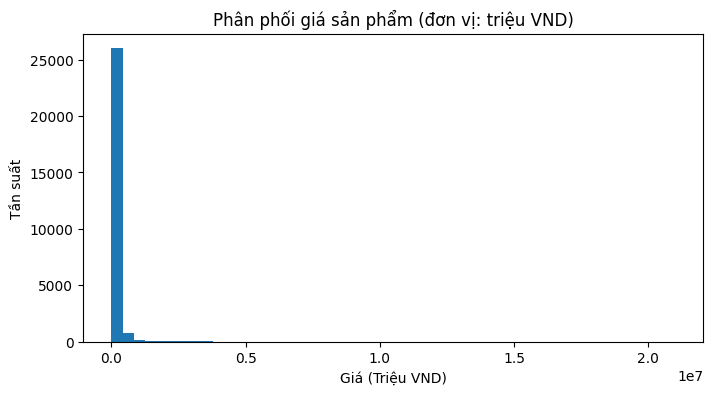

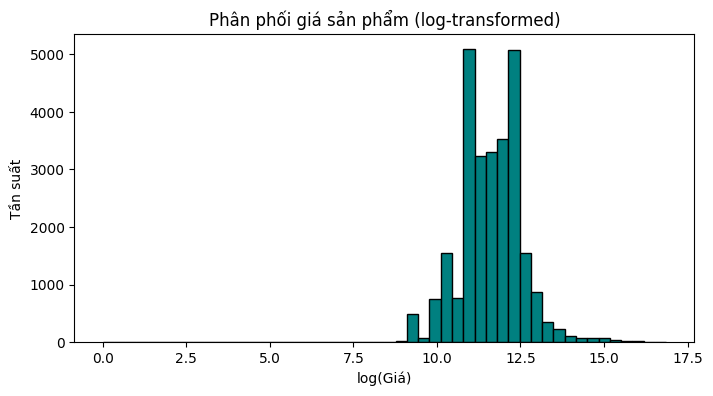

In [ ]:
#Trực quan giá
price = df_item.select("price").to_series().to_pandas()
plt.figure(figsize=(8,4))
plt.hist(price, bins=50)
plt.title("Phân phối giá sản phẩm (đơn vị: triệu VND)")
plt.xlabel("Giá (Triệu VND)")
plt.ylabel("Tần suất")
plt.show()



# Log-transform
plt.figure(figsize=(8, 4))
# Cast price to float before applying log1p
plt.hist(np.log1p(price.astype(float)), bins=50, color="teal", edgecolor="black")
plt.title("Phân phối giá sản phẩm (log-transformed)")
plt.xlabel("log(Giá)")
plt.ylabel("Tần suất")
plt.show()


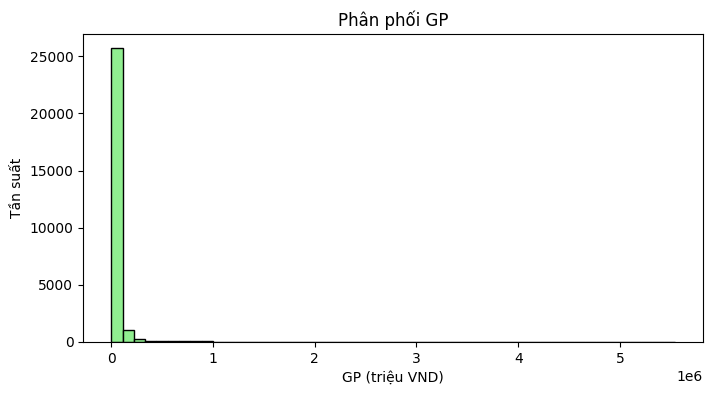

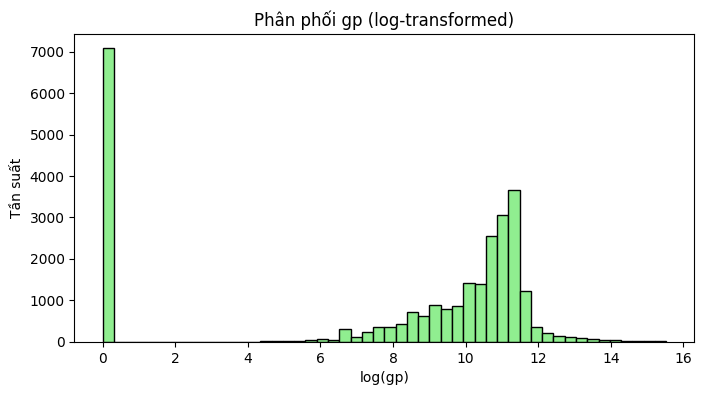

In [ ]:
#Trực quan gp
gp = (
    df_item
    .select("gp")
    .to_series()
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.hist(gp, bins=50, color="lightgreen", edgecolor="black")
plt.title("Phân phối GP")
plt.xlabel("GP (triệu VND)")
plt.ylabel("Tần suất")
plt.show()


# Log-transform
plt.figure(figsize=(8, 4))
# Cast price to float before applying log1p
plt.hist(np.log1p(gp.astype(float)), bins=50, color="lightgreen", edgecolor="black")
plt.title("Phân phối gp (log-transformed)")
plt.xlabel("log(gp)")
plt.ylabel("Tần suất")
plt.show()


Do giá tập trung cao ở đoạn từ < 500 ngàn nên tôi sẽ vẽ lại biểu đồ hist cho các sản phẩ, giá dưới 500

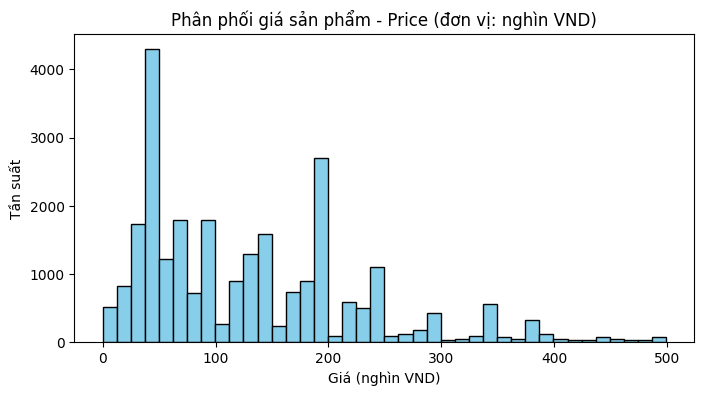

In [ ]:
# Lọc giá hợp lý (dưới 500 nghìn)
price = (
    df_item
    .filter((pl.col("price") > 0) & (pl.col("price") < 500_000))
    .select("price")
    .to_series()
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.hist(price / 1_000, bins=40,color="skyblue", edgecolor="black")
plt.title("Phân phối giá sản phẩm - Price (đơn vị: nghìn VND)")
plt.xlabel("Giá (nghìn VND)")
plt.ylabel("Tần suất")
plt.show()


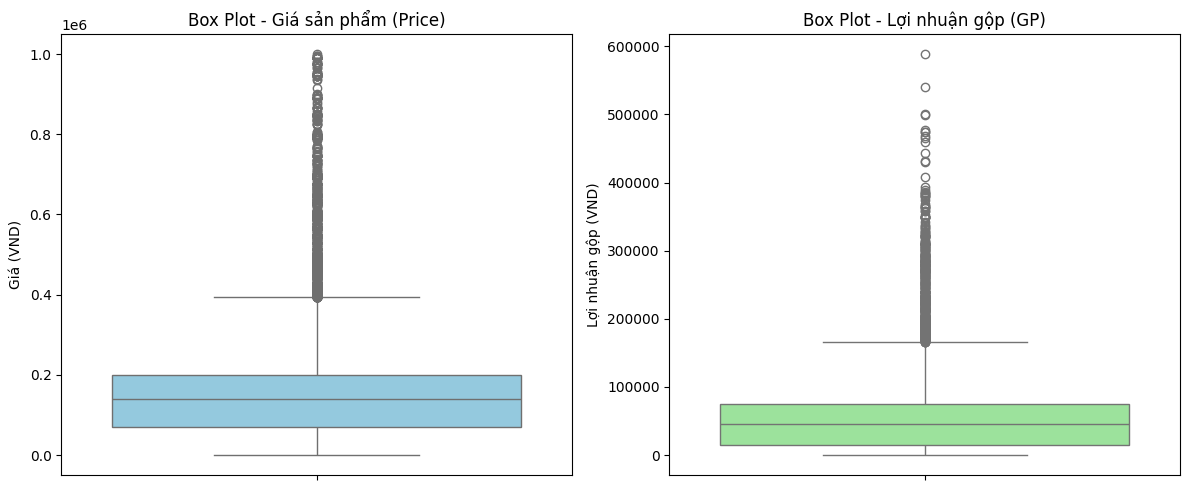

In [ ]:
# Lọc dữ liệu loại bỏ giá trị ngoại lai (outlier)
df_num = (
    df_item
    .filter((pl.col("price") > 0) & (pl.col("price") < 1_000_000))
    .filter((pl.col("gp") > 0) & (pl.col("gp") < 1_000_000))
    .to_pandas()
)

# Tạo figure gồm 2 boxplot song song
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- PRICE ---
sns.boxplot(y=df_num["price"], color="skyblue", ax=axes[0])
axes[0].set_title("Box Plot - Giá sản phẩm (Price)")
axes[0].set_ylabel("Giá (VND)")

# --- GP ---
sns.boxplot(y=df_num["gp"], color="lightgreen", ax=axes[1])
axes[1].set_title("Box Plot - GP")
axes[1].set_ylabel("Lợi nhuận gộp (VND)")

plt.tight_layout()
plt.show()


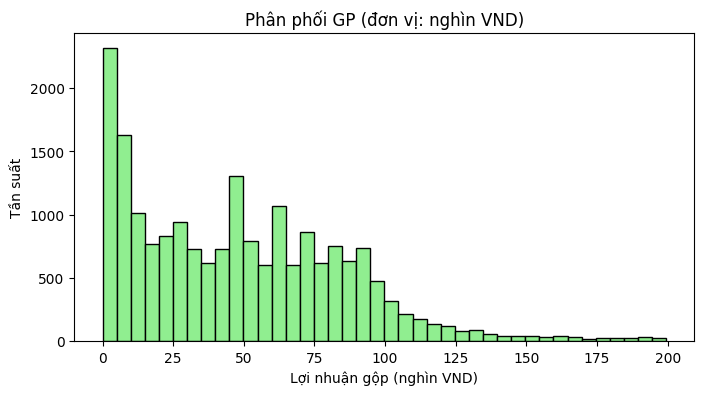

In [ ]:
gp = (
    df_item
    .filter((pl.col("gp") > 0) & (pl.col("gp") < 200_000))
    .select("gp")
    .to_series()
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.hist(gp / 1_000, bins=40, color="lightgreen", edgecolor="black")
plt.title("Phân phối GP (đơn vị: nghìn VND)")
plt.xlabel("Lợi nhuận gộp (nghìn VND)")
plt.ylabel("Tần suất")
plt.show()


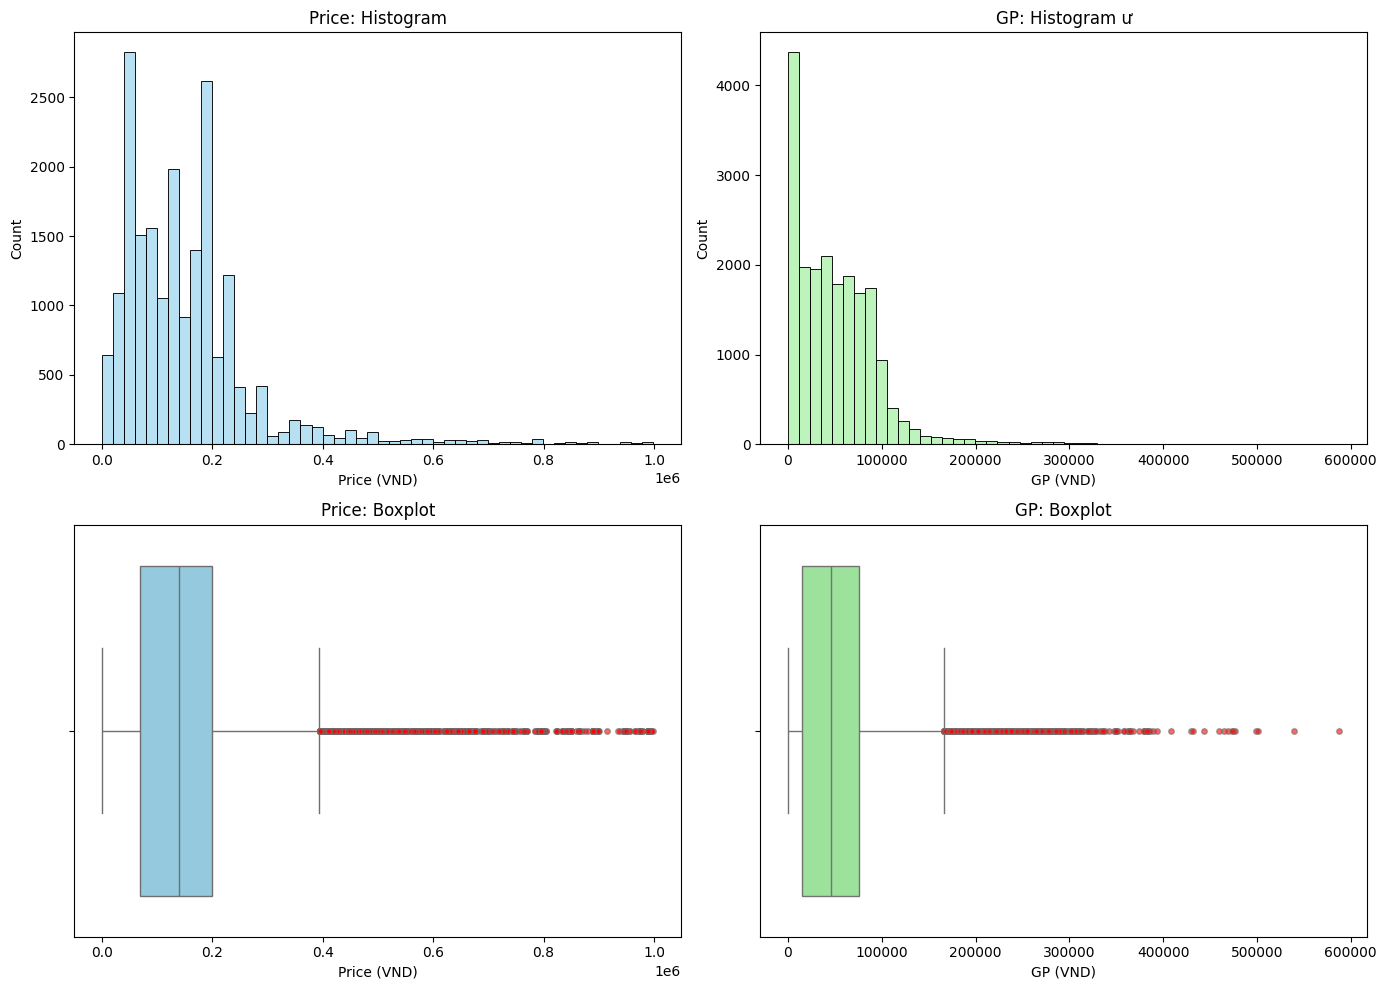

In [ ]:
# --- Chuẩn bị dữ liệu (lọc outlier) ---
df_num = (
    df_item
    .filter((pl.col("price") > 0) & (pl.col("price") < 1_000_000))
    .filter((pl.col("gp") > 0) & (pl.col("gp") < 1_000_000))
    .select(["price", "gp"])
    .to_pandas()
)

# --- Vẽ histogram + KDE (với màu KDE rõ ràng) và boxplot ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price: histogram
sns.histplot(df_num["price"], bins=50, color="skyblue", edgecolor="black", ax=axes[0,0], alpha=0.6)
axes[0,0].set_title("Price: Histogram")
axes[0,0].set_xlabel("Price ( triệu VND)")
axes[0,0].set_ylabel("Count")

# GP: histogram
sns.histplot(df_num["gp"], bins=50, color="lightgreen", edgecolor="black", ax=axes[0,1], alpha=0.6)
axes[0,1].set_title("GP: Histogram ư")
axes[0,1].set_xlabel("GP (triệu VND)")
axes[0,1].set_ylabel("Count")

# Price: boxplot
sns.boxplot(x=df_num["price"], ax=axes[1,0], color="skyblue",
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
axes[1,0].set_title("Price: Boxplot")
axes[1,0].set_xlabel("Price (triệu VND)")

# GP: boxplot
sns.boxplot(x=df_num["gp"], ax=axes[1,1], color="lightgreen",
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
axes[1,1].set_title("GP: Boxplot")
axes[1,1].set_xlabel("GP (triệu VND)")

plt.tight_layout()
plt.show()


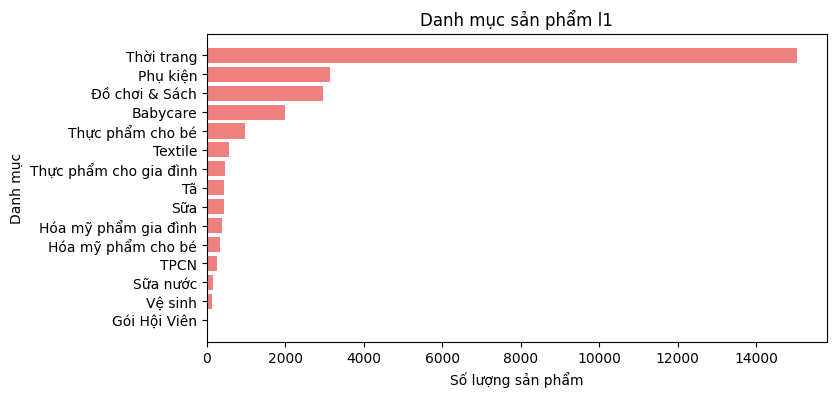

In [ ]:
#Tần suất các danh mục sản phẩm l1(category_l1)
#Xuất hết
cat_counts = (
    df_item["category_l1"]
    .value_counts()
    .sort("count", descending=True)
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.barh(cat_counts["category_l1"], cat_counts["count"], color="lightcoral")
plt.gca().invert_yaxis()
plt.title("Danh mục sản phẩm l1")
plt.xlabel("Số lượng sản phẩm")
plt.ylabel("Danh mục")
plt.show()


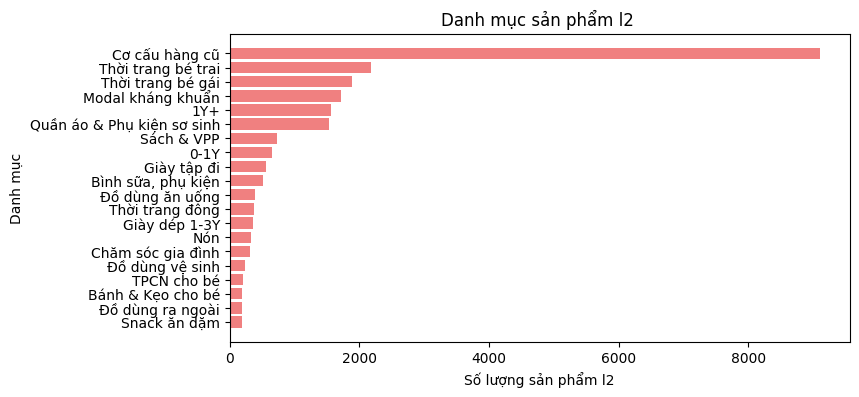

In [ ]:
#Tần suất các danh mục sản phẩm l2 (category_l2)
#Xuất top 20
cat_counts = (
    df_item["category_l2"]
    .value_counts()
    .sort("count", descending=True)
    .head(20)
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.barh(cat_counts["category_l2"], cat_counts["count"], color="lightcoral")
plt.gca().invert_yaxis()
plt.title("Danh mục sản phẩm l2 ")
plt.xlabel("Số lượng sản phẩm l2")
plt.ylabel("Danh mục")
plt.show()


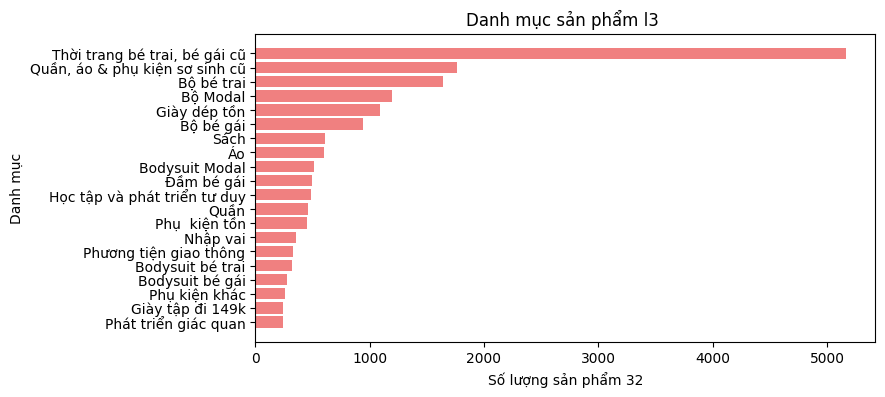

In [ ]:
#Tần suất các danh mục sản phẩm l3 (category_l3)
#Xuất top 20
cat_counts = (
    df_item["category_l3"]
    .value_counts()
    .sort("count", descending=True)
    .head(20)
    .to_pandas()
)

plt.figure(figsize=(8,4))
plt.barh(cat_counts["category_l3"], cat_counts["count"], color="lightcoral")
plt.gca().invert_yaxis()
plt.title("Danh mục sản phẩm l3 ")
plt.xlabel("Số lượng sản phẩm 32")
plt.ylabel("Danh mục")
plt.show()


In [ ]:
#NHÁP
# Giới hạn chỉ vẽ top N giá trị cho dễ nhìn
TOP_N = 10

for col in categorical_cols:
    # Lấy tần suất
    cat_counts = (
        df_item[col]
        .value_counts()
        .sort("count", descending=True)
        .head(TOP_N)
        .to_pandas()
    )

    # Nếu cột toàn NaN hoặc rỗng, bỏ qua
    if cat_counts.empty:
        print(f"Bỏ qua cột '{col}' (không có dữ liệu).")
        continue

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 4))
    plt.barh(cat_counts[col].astype(str), cat_counts["count"], color="lightcoral")
    plt.gca().invert_yaxis()
    plt.title(f"Tần suất giá trị phổ biến của '{col}'")
    plt.xlabel("Số lượng")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#=========================================NHÁPPPPPPPPPPPPPP=============================================

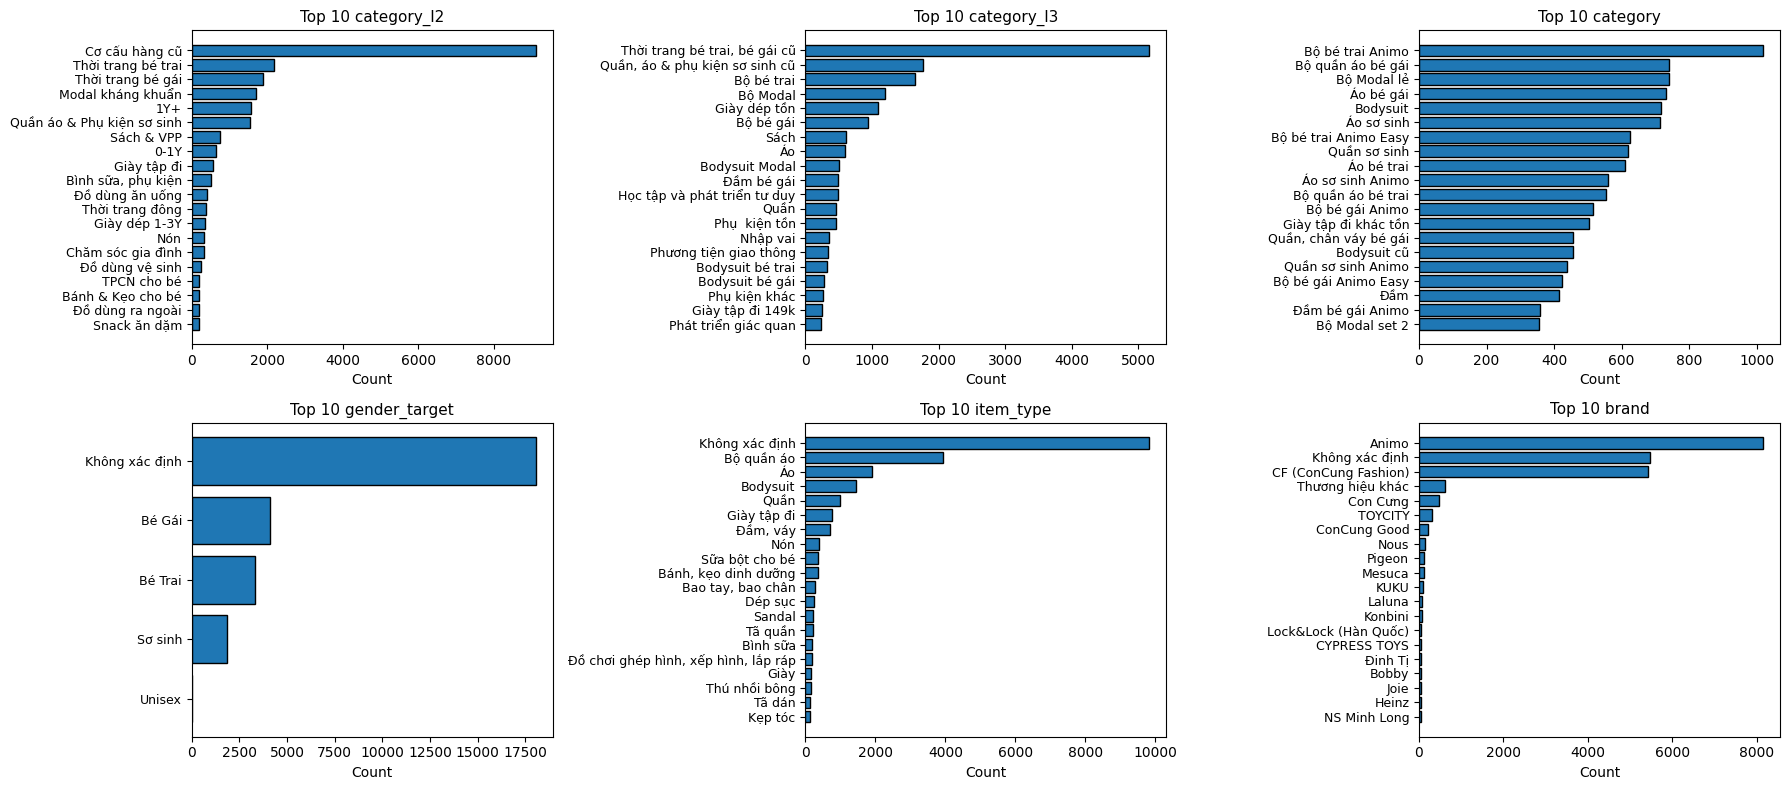

In [ ]:
# Danh sách cột
cat_simple = [ "category_l2", "category_l3",
              "category", "gender_target", "item_type", "brand"]

num_plots = len(cat_simple)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_simple):
    # Lấy DataFrame top 10 theo Polars
    top_df = (
        df_item[col]
        .value_counts()
        .sort("count", descending=True)
        .head(20)
        .to_pandas()
    )

    # Nếu rỗng thì bỏ qua
    if top_df.empty:
        axes[i].text(0.5, 0.5, f"No data for {col}", ha='center')
        axes[i].axis('off')
        continue

    # Chuyển giá trị cột sang string để tránh lỗi khi có list/object
    labels = top_df[col].astype(str)
    counts = top_df["count"]

    # Vẽ bar ngang
    axes[i].barh(labels, counts, color="tab:blue", edgecolor="black")
    axes[i].invert_yaxis()
    axes[i].set_title(f"Top 10 {col}", fontsize=11)
    axes[i].set_xlabel("Count")
    axes[i].tick_params(axis='x', rotation=0)
    # Nếu nhãn dài — thu nhỏ font và wrap một chút
    axes[i].tick_params(axis='y', labelsize=9)

# Ẩn các ô thừa nếu có
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


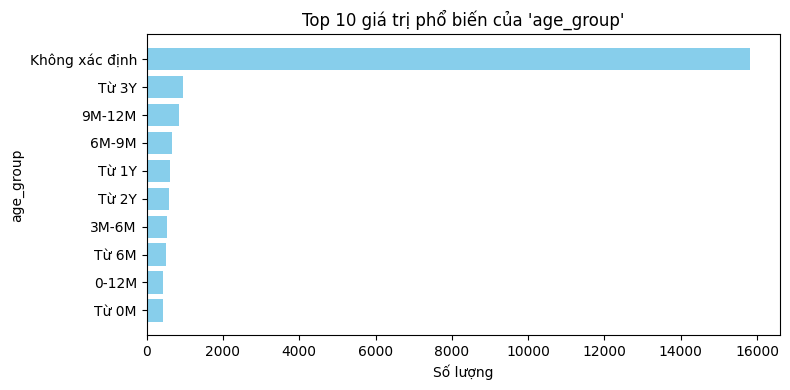

/tmp/ipython-input-1648760408.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


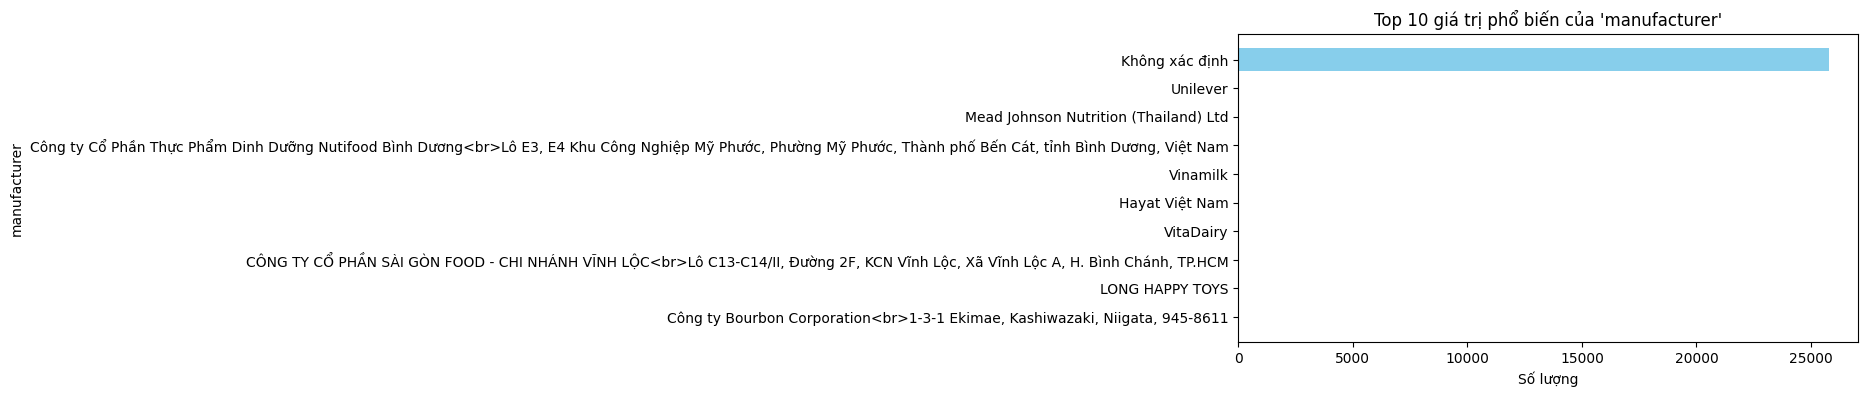

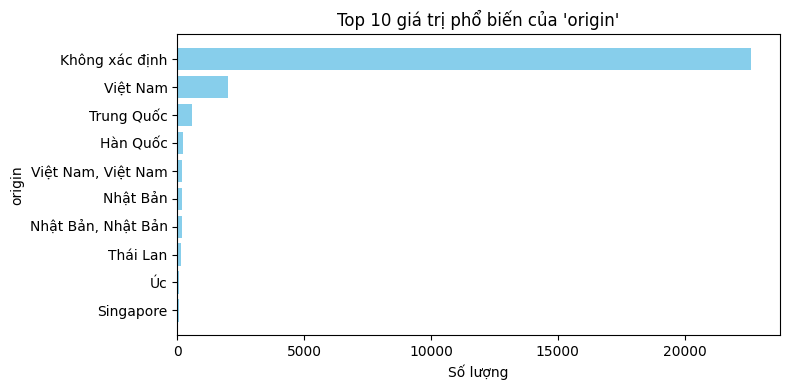

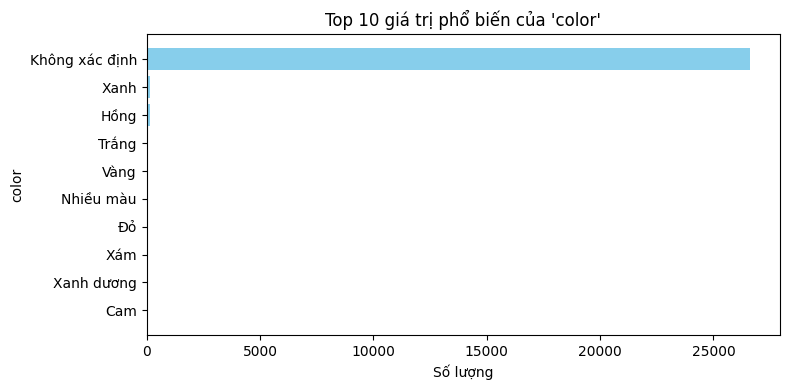

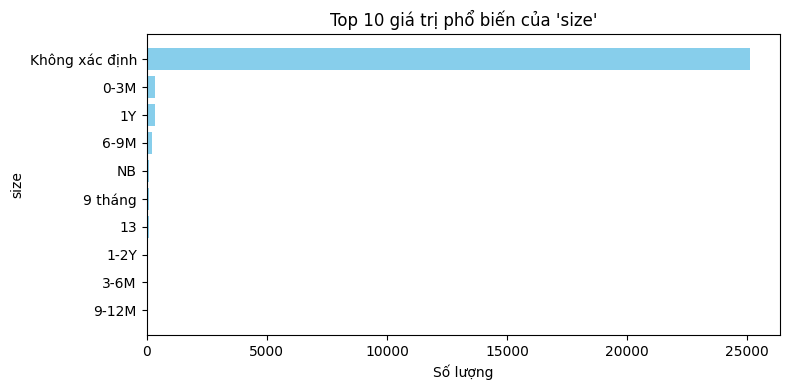

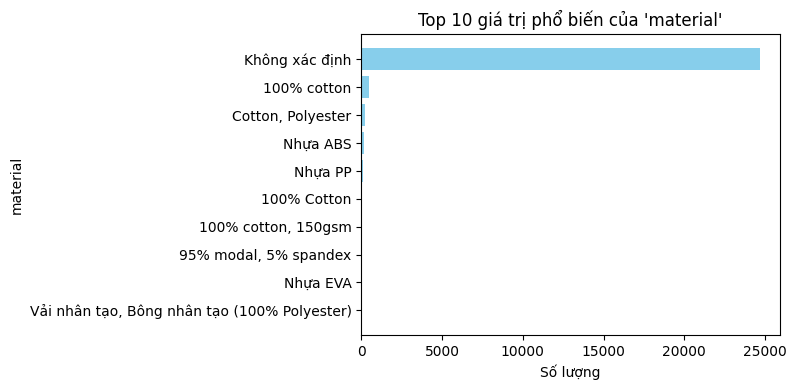

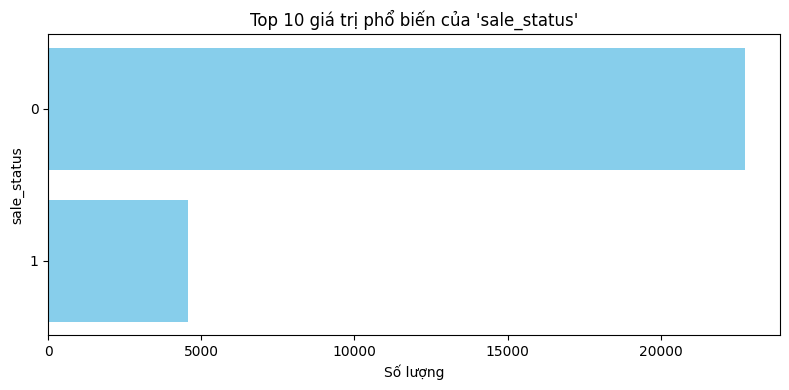

In [ ]:
top_columns = ["age_group", "manufacturer", "origin", "color", "size", "material", "sale_status"]

for col in top_columns:
    counts = (
        df_item[col]
        .value_counts()
        .sort("count", descending=True)
        .head(10)
        .to_pandas()
    )
    plt.figure(figsize=(8, 4))
    plt.barh(counts[col].astype(str), counts["count"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 giá trị phổ biến của '{col}'")
    plt.xlabel("Số lượng")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Phân tích đa biến

In [ ]:
import polars as pl

# Chọn các cột numeric bạn muốn xem
num_cols = ["price", "gp"]

# Tính hệ số tương quan Pearson giữa các cặp
corrs = []
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        col1, col2 = num_cols[i], num_cols[j]
        # Dùng hàm pearson_corr của Polars
        corr = df_item.select(pl.pearson_corr(col1, col2).alias("corr")).item()
        corrs.append({"Biến 1": col1, "Biến 2": col2, "Hệ số tương quan": corr})

# Chuyển thành DataFrame để xem gọn
corr_df = pl.DataFrame(corrs)
corr_df


AttributeError: module 'polars' has no attribute 'pearson_corr'